<a href="https://colab.research.google.com/github/xxxnmxhj00/Deep-Learning/blob/main/4_3%20%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%A0%81%EC%9A%A9%ED%95%B4%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.boston_housing import load_data

(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz', test_split=0.2, seed=777)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [ ]:
import numpy as np
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.33,
                                                  random_state=777)

In [ ]:
print(f'train :{x_train.shape},{y_train.shape}')
print(f'val :{x_val.shape}{y_val.shape}')
print(f'test :{x_test.shape},{y_test.shape}')

train :(270, 13),(270,)
val :(134, 13)(134,)
test :(102, 13),(102,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss ='mse',
              metrics = ['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(x_train, y_train, epochs=300,
                    validation_data=(x_val, y_val))

Epoch 1/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 614.9116 - mae: 22.8312 - val_loss: 587.6677 - val_mae: 21.9403
Epoch 2/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 522.6809 - mae: 21.0465 - val_loss: 551.0337 - val_mae: 21.0982
Epoch 3/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 463.1651 - mae: 19.8628 - val_loss: 511.7647 - val_mae: 20.1455
Epoch 4/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 456.9291 - mae: 19.5610 - val_loss: 467.1401 - val_mae: 19.0168
Epoch 5/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 429.9932 - mae: 18.6833 - val_loss: 416.0674 - val_mae: 17.6618
Epoch 6/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 373.0459 - mae: 17.2425 - val_loss: 357.8093 - val_mae: 16.1075
Epoch 7/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 292.4822 - mae: 15.0109 - val_loss: 294.7863 - val_mae: 14.3078
Epoch 8/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 232.3689 - mae: 13.2419 - val_loss: 230.2235 - val_mae: 12.3392
Epoch 9/300
9/9 ━━━━━━━━━━━━━━━

In [ ]:
model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.2510 - mae: 2.2211  


[8.496867179870605, 2.089367151260376]

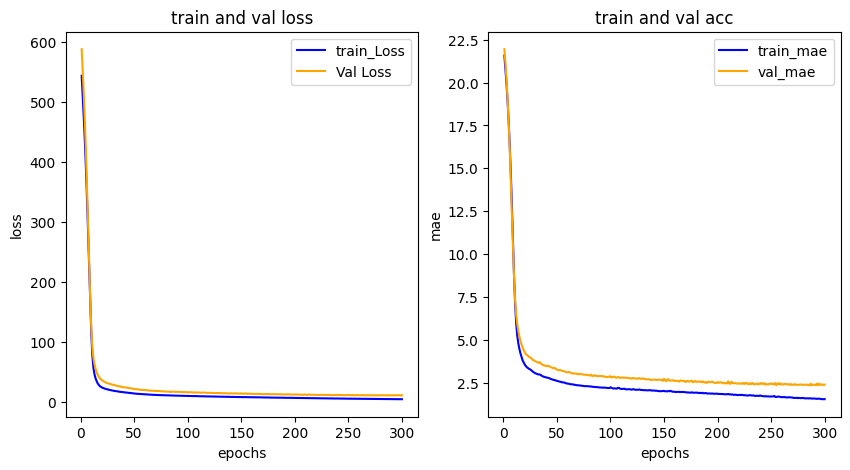

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_Loss')
ax1.plot(epochs, val_loss, color='orange', label='Val Loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['mae']
val_acc = his_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_mae')
ax2.plot(epochs, val_acc, color='orange', label='val_mae')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()

In [ ]:
results = model.predict(x_test).reshape(102,)
print(results.shape)
print(f'results[0]:{results[0]}')
print(f'y_test[0]:{y_test[0]}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
(102,)
results[0]:21.46814727783203
y_test[0]:21.4


In [ ]:
# 실제 가격과 예측 가격의 차이가 평균적으로 2200 달러정도 차이가 있음을 의미

In [ ]:

from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
from sklearn.model_selection import KFold

(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz',
                                                 test_split=0.2,
                                                 seed=777)

mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std


k = 3
kfold = KFold(n_splits=k, random_state= 777,shuffle=True)

def get_model() :
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(13,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

mae_list = []

for train_index, val_index in kfold.split(x_train) :
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = get_model()

    model.fit(x_train_fold, y_train_fold, epochs=300,
              validation_data=(x_val_fold, y_val_fold))

    _,test_mae = model.evaluate(x_val_fold, y_val_fold)
    mae_list.append(test_mae)


Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 515.2939 - mae: 20.9785 - val_loss: 570.4916 - val_mae: 21.6011
Epoch 2/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 499.1769 - mae: 20.6286 - val_loss: 534.2787 - val_mae: 20.7779
Epoch 3/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 476.1898 - mae: 19.9553 - val_loss: 493.5045 - val_mae: 19.8027
Epoch 4/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 424.3555 - mae: 18.6452 - val_loss: 445.8943 - val_mae: 18.6130
Epoch 5/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 376.0023 - mae: 17.5182 - val_loss: 390.4450 - val_mae: 17.1463
Epoch 6/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 333.3404 - mae: 16.4196 - val_loss: 326.8126 - val_mae: 15.3479
Epoch 7/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 274.5869 - mae: 14.6260 - val_loss: 260.2280 - val_mae: 13.3065
Epoch 8/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 187.6970 - mae: 11.6113 - val_loss: 195.6413 - val_mae: 11.1310
Epoch 9/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms

In [ ]:
print(mae_list)

[2.490170955657959, 2.6217565536499023, 2.511462450027466]


In [ ]:
print(np.mean(mae_list))

2.541129986445109
